In [82]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import eurostat

# 1. Programming

The project must be explored programmatically: this means that you must implement suitable Python tools (code and/or libraries) to complete the analysis required. All of this is to be implemented in a Jupyter Notebook.

[0-20]

## Answer

I organized the project into five Jupyter Notebooks: `CA2_ML_Code.ipynb`, `CA2_Programming_Code.ipynb`, `CA2_Statistics_Code.ipynb`, and `CA2_Data_Visualisation.ipynb`. The project is programmatically explored using Python, emphasizing modularity and narrative-style programming.


# 2. Data Structures

You are required to gather and process data that has been stored in at least two distinct formats. For example, this can be data in a CSV file, from a MySQL database, or from a web API in JSON format.

\[0-20\]


# Formats
## From a CSV file:

In [23]:
# Passenger Journeys by Luas
# Source: https://data.gov.ie/dataset/tii03-passenger-journeys-by-luas
# Unit: Weekly passenger number
# Licence: https://creativecommons.org/licenses/by/4.0/
prdf = pd.read_csv('TII03.20231227215009.csv')

In [24]:
prdf.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


# From web API in CSV format:

In [27]:
# Passenger Journeys by Luas
# Source: https://data.gov.ie/dataset/tii03-passenger-journeys-by-luas
# Unit: Weekly passenger number
# Licence: https://creativecommons.org/licenses/by/4.0/
prdf1 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TII03/CSV/1.0/en')

In [28]:
prdf1.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0


# From web API in JSON format:

In [55]:
# Requesting JSON data from the API
response = requests.get('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/THA25/JSON-stat/1.0/en')

In [56]:
# Loading JSON data into a Python dictionary
prdf2 = response.json()

Before parsing JSON data, we need to understand its structure.

In [58]:
# Read the PNG image
img = mpimg.imread('json_codebeautify_input.png')
# Read the PNG image
img1 = mpimg.imread('json_codebeautify_output.png')

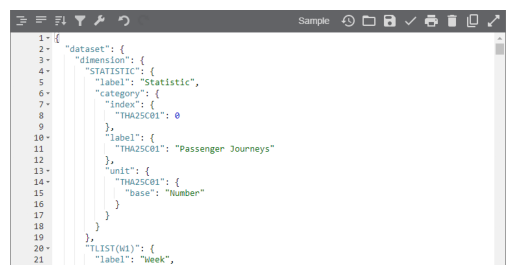

In [59]:
# Display the image
plt.imshow(img)
plt.axis('off')  # Turning off axis labels
plt.show()

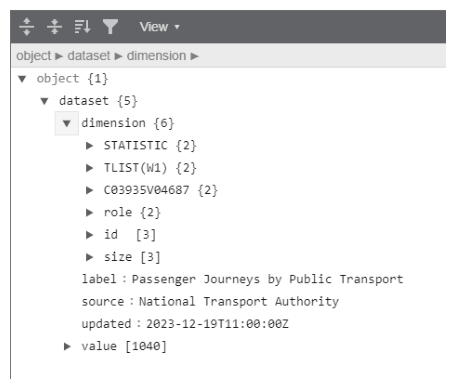

In [60]:
# Display the image
plt.imshow(img1)
plt.axis('off')  # Turning off axis labels
plt.show()

Once we understand the structure, we can begin parsing it.

In [62]:
# Extracting statistic label 'Passenger Journeys'
statistic_label = [prdf2['dataset']['dimension']['STATISTIC']['category']['label']['THA25C01']]

- **`prdf2`**: This is the variable representing the Python dictionary containing the JSON data obtained from the API response.

- **`['dataset']`**: This accesses the 'dataset' key within the dictionary.

- **`['dimension']`**: This accesses the 'dimension' key within the 'dataset' part of the dictionary.

- **`['STATISTIC']`**: This accesses the 'STATISTIC' key within the 'dimension' part of the dictionary.

- **`['category']`**: This accesses the 'category' key within the 'STATISTIC' part of the dictionary.

- **`['label']`**: This accesses the 'label' key within the 'category' part of the dictionary.

- **`['THA25C01']`**: This accesses the specific label with the key 'THA25C01' within the 'label' part of the dictionary.

- **`[...]`**: This entire expression is enclosed in square brackets (`[]`), creating a list. In this case, it's a list containing a single element, which is the value corresponding to the 'THA25C01' key.

**week_index**, **week_label**, **transmode_index** and **transmode_label** will follow the same logic.

In [63]:
# Extracting the labels and indices for the 'Week' dimension
week_index = list(prdf2['dataset']['dimension']['TLIST(W1)']['category']['index'].values())
week_label = list(prdf2['dataset']['dimension']['TLIST(W1)']['category']['label'].values())

In [33]:
# Extracting the labels and indices for the 'Mode of Transport' dimension
transmode_index = list(prdf2['dataset']['dimension']['C03935V04687']['category']['index'].keys())
transmode_label = list(prdf2['dataset']['dimension']['C03935V04687']['category']['label'].values())

In [ ]:
# Creating a MultiIndex for the DataFrame
index = pd.MultiIndex.from_product([statistic_label, week_label, transmode_label], names=['Statistic', 'Week', 'Mode_of_Transport'])

**`pd.MultiIndex.from_product`:** This is a method provided by the Pandas library for creating a MultiIndex. A MultiIndex is an index structure that allows you to have multiple levels of indexing in a DataFrame.

**`[statistic_label, week_label, transmode_label]`:** This part creates a list containing three elements: `statistic_label`, `week_label`, and `transmode_label`. Each of these represents a label associated with a specific dimension. For example, `statistic_label` might be something like ['Passenger Journeys'].

**`names=['Statistic', 'Week', 'Mode_of_Transport']`:** This specifies the names for each level of the MultiIndex. In this case, the levels are named 'Statistic', 'Week', and 'Mode_of_Transport'. These names can be used later to reference the levels in the DataFrame.

**`index = pd.MultiIndex.from_product(...)`:** This is assigning the created MultiIndex to the variable `index`. It will be used as the index for the DataFrame.

In summary, this line of code is creating a MultiIndex for a DataFrame with three levels: 'Statistic', 'Week', and 'Mode_of_Transport'. The values for each level come from the lists `statistic_label`, `week_label`, and `transmode_label`. This MultiIndex will be used to set the hierarchical index of the DataFrame.


In [67]:
# Extracting the values information
values = prdf2['dataset']['value']

# Creating the DataFrame
prdf2 = pd.DataFrame(values, columns=['VALUE'], index=index)

# Resetting index to convert MultiIndex to columns
prdf2.reset_index(inplace=True)

# Display 5 first rows
prdf2.head()

,Statistic,Week,Mode_of_Transport,VALUE
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,1987891.0
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",497598.0
2,Passenger Journeys,2019 Week 01,Rail,NaN
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",2485489.0
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,2709579.0


# From eurostat module:
The **eurostat** package is a Python library designed to facilitate the retrieval and manipulation of data from the Eurostat database.

The **eurostat** package simplifies the process of accessing Eurostat data by providing a convenient interface for querying and retrieving datasets directly into a Pandas DataFrame.

In [86]:
# Modal split of inland passenger transport
# Unit of measure (% based on passenger-kilometres) : one passenger-km is one passenger transported over one kilometre
# https://ec.europa.eu/eurostat/databrowser/view/TRAN_HV_PSMOD__custom_2638259/bookmark/table?lang=en&bookmarkId=2d735f97-a7d6-4b24-bc27-a6c8e21db6a7
# Licence: https://ec.europa.eu/eurostat/about-us/policies/copyright
prdf3 = eurostat.get_data_df('TRAN_HV_PSMOD',True)                                                                 
prdf3.head()

,freq,unit,vehicle,geo\TIME_PERIOD,1990_value,1990_flag,1991_value,1991_flag,1992_value,1992_flag,...,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag
0,A,PC,BUS_TOT,AT,11.0,,10.6,,10.5,,...,10.0,,9.5,be,9.7,e,9.3,e,9.0,e
1,A,PC,BUS_TOT,BE,10.6,e,10.7,e,10.7,e,...,10.2,e,10.3,e,10.4,e,8.2,e,8.2,e
2,A,PC,BUS_TOT,BG,NaN,:,NaN,:,NaN,:,...,13.1,e,12.0,e,13.0,e,8.6,e,8.0,e
3,A,PC,BUS_TOT,CH,3.7,,3.9,,4.0,,...,5.9,e,5.9,e,6.1,e,5.8,e,5.9,e
4,A,PC,BUS_TOT,CY,NaN,:,NaN,:,NaN,:,...,19.0,e,18.9,e,18.5,e,12.6,e,12.7,e


In [87]:
prdf3.to_csv('TRAN_HV_PSMOD.csv', index=False)